# New section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:


# Load CSV file - replace with your path
df = pd.read_csv('/content/Mild Steel Futures Historical Data.csv')

# Rename and clean columns
df.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change %']
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Convert 'Date' column to datetime - allow mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Filter data between 5 June 2022 and 4 June 2025
mask = (df['Date'] >= '2022-06-05') & (df['Date'] <= '2025-06-04')
df_filtered = df.loc[mask]

# Sort by date
df_filtered = df_filtered.sort_values('Date')


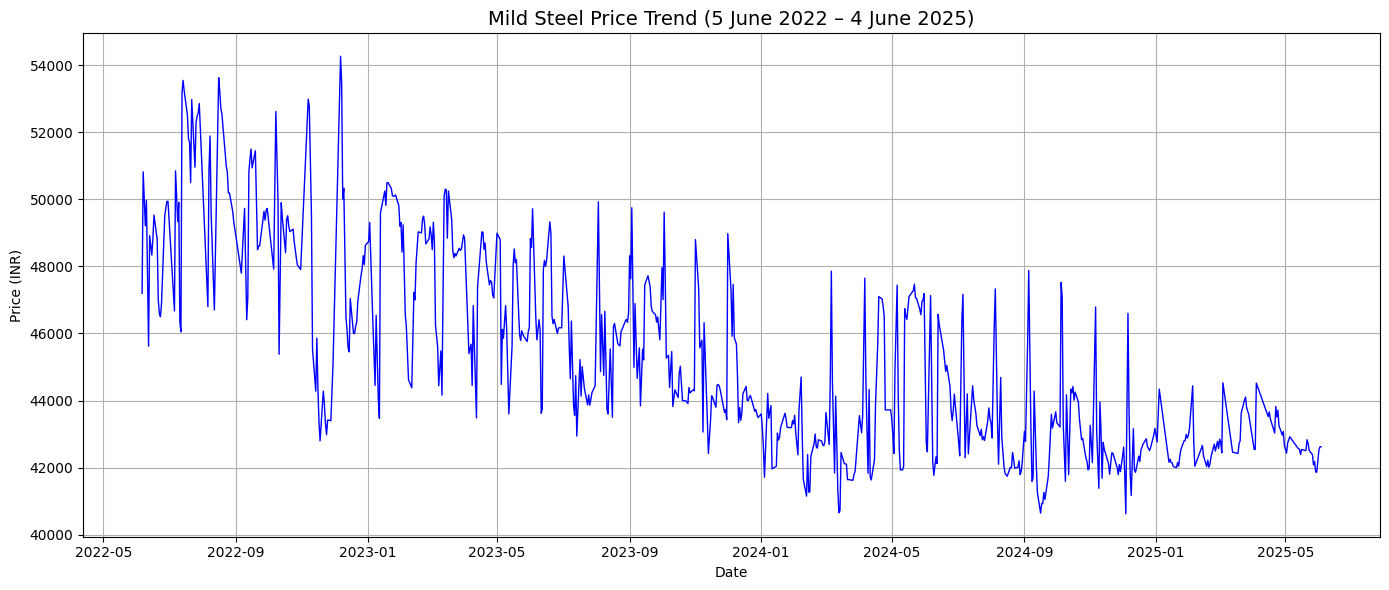

In [ ]:
# Plot Price vs Date
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['Date'], df_filtered['Price'], color='blue', linewidth=1)
plt.title('Mild Steel Price Trend (5 June 2022 – 4 June 2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

## **How These Help with Trend Analysis**:

**Moving Average Plot**: Helps focus on recent trends and see short-term vs long-term price behavior closely.

**Daily Returns**: Quantifies day-to-day price change, useful to understand volatility.

**Rolling Volatility**: Identifies periods when price movements were more or less volatile, useful for risk assessment.

**Exponential Moving Averages (EMA)**: More sensitive to recent price changes than simple MA, capturing trend shifts faster.

**MACD Indicator**: Shows momentum and potential buy/sell signals through convergence/divergence of EMAs.

**Seasonal Decomposition**: Detects any repeating seasonal patterns or cycles in prices, which can guide timing for buying or selling.

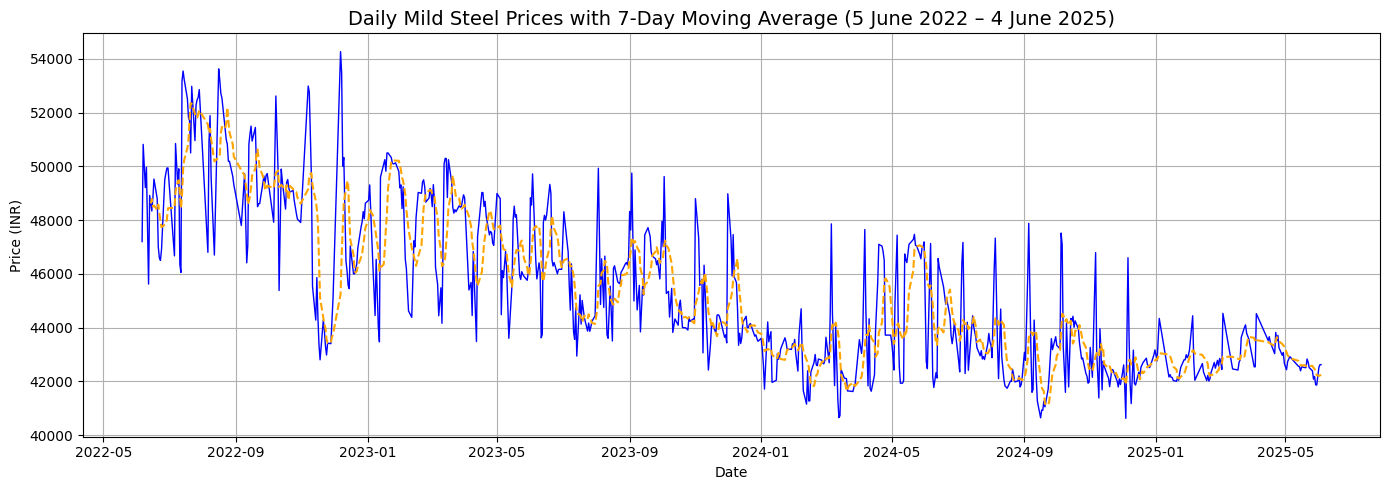

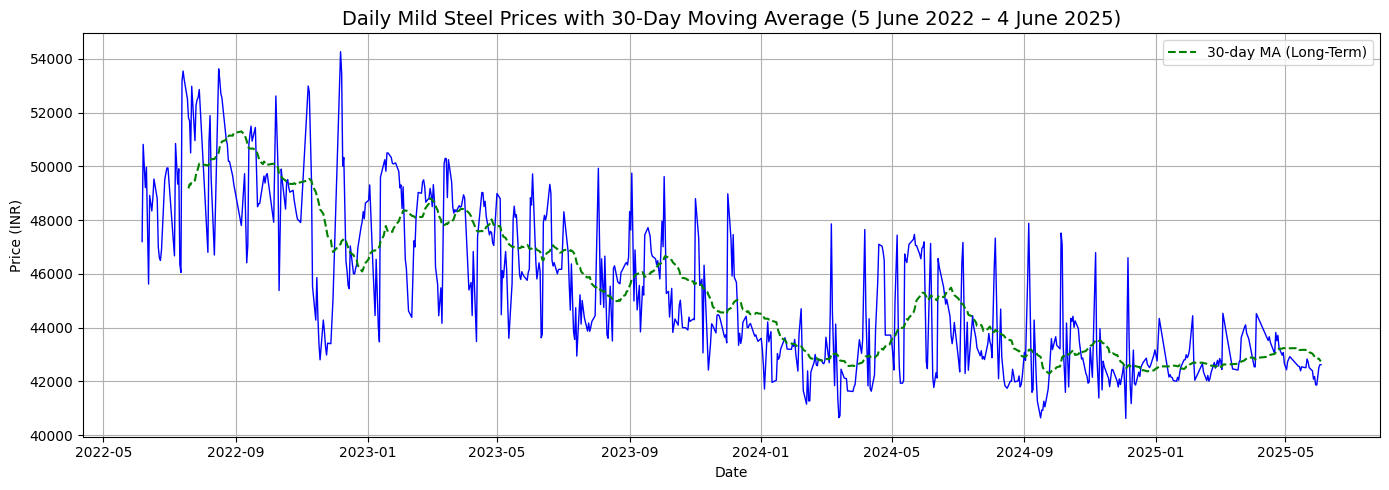

In [ ]:
# Compute moving averages
df_filtered['7-day MA'] = df_filtered['Price'].rolling(window=7).mean()
df_filtered['30-day MA'] = df_filtered['Price'].rolling(window=30).mean()


# 1. Plot Daily Price
plt.figure(figsize=(14, 5))
plt.plot(df_filtered['Date'], df_filtered['Price'], color='blue', linewidth=1)
plt.plot(df_filtered['Date'], df_filtered['7-day MA'], label='7-day MA (Short-Term)', color='orange', linestyle='--')
plt.title('Daily Mild Steel Prices with 7-Day Moving Average (5 June 2022 – 4 June 2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot Moving Averages
plt.figure(figsize=(14, 5))
plt.plot(df_filtered['Date'], df_filtered['Price'], color='blue', linewidth=1)
plt.plot(df_filtered['Date'], df_filtered['30-day MA'], label='30-day MA (Long-Term)', color='green', linestyle='--')
plt.title('Daily Mild Steel Prices with 30-Day Moving Average (5 June 2022 – 4 June 2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



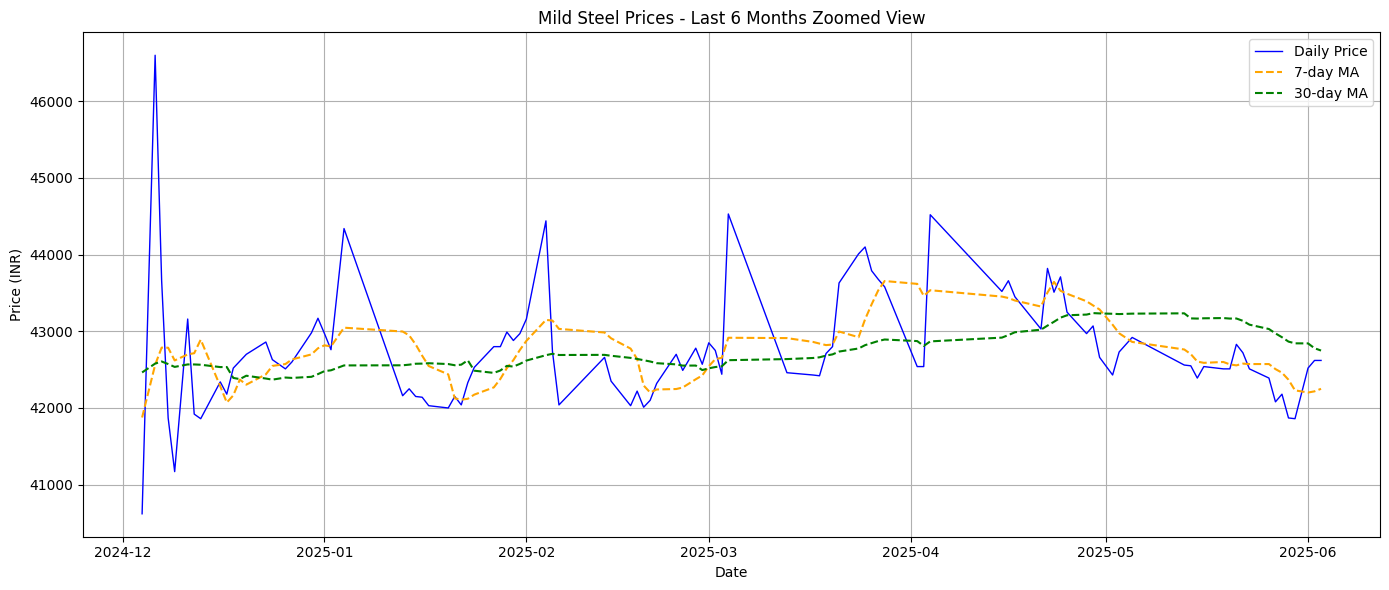

In [ ]:
import matplotlib.pyplot as plt

# Zoom into the most recent 6 months for detailed view
recent_data = df_filtered[df_filtered['Date'] > (df_filtered['Date'].max() - pd.DateOffset(months=6))]

plt.figure(figsize=(14, 6))
plt.plot(recent_data['Date'], recent_data['Price'], label='Daily Price', color='blue', linewidth=1)
plt.plot(recent_data['Date'], recent_data['7-day MA'], label='7-day MA', color='orange', linestyle='--')
plt.plot(recent_data['Date'], recent_data['30-day MA'], label='30-day MA', color='green', linestyle='--')
plt.title('Mild Steel Prices - Last 6 Months Zoomed View')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Daily Returns**: Quantifies day-to-day price change, useful to understand volatility.

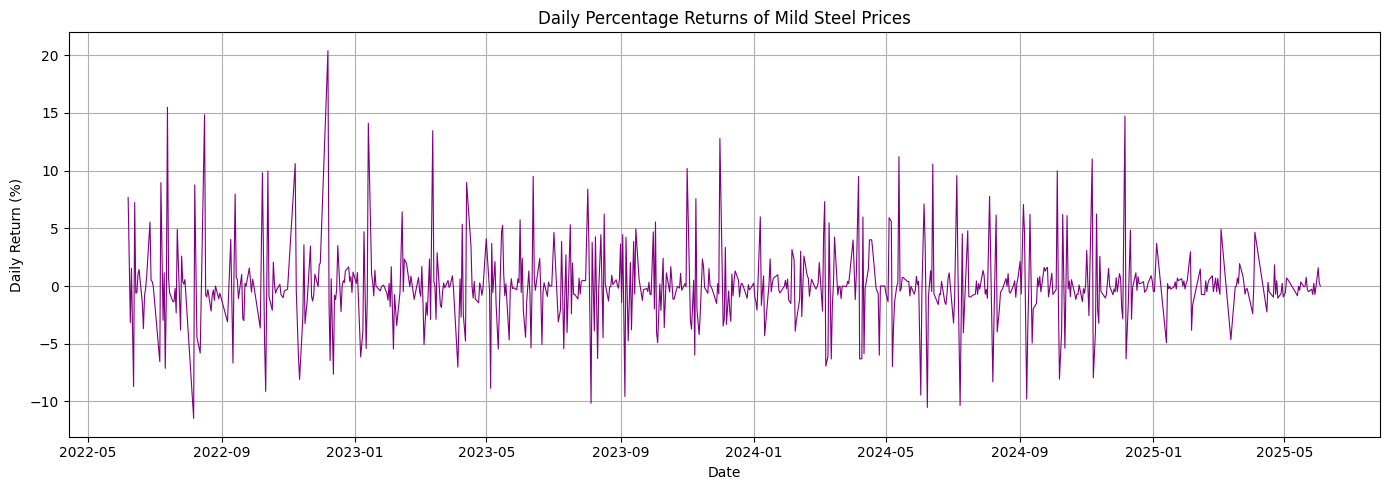

In [ ]:
# Calculate daily returns in percentage
df_filtered['Daily Return (%)'] = df_filtered['Price'].pct_change() * 100

plt.figure(figsize=(14, 5))
plt.plot(df_filtered['Date'], df_filtered['Daily Return (%)'], color='purple', linewidth=0.8)
plt.title('Daily Percentage Returns of Mild Steel Prices')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Rolling Volatility**: Identifies periods when price movements were more or less volatile, useful for risk assessment.

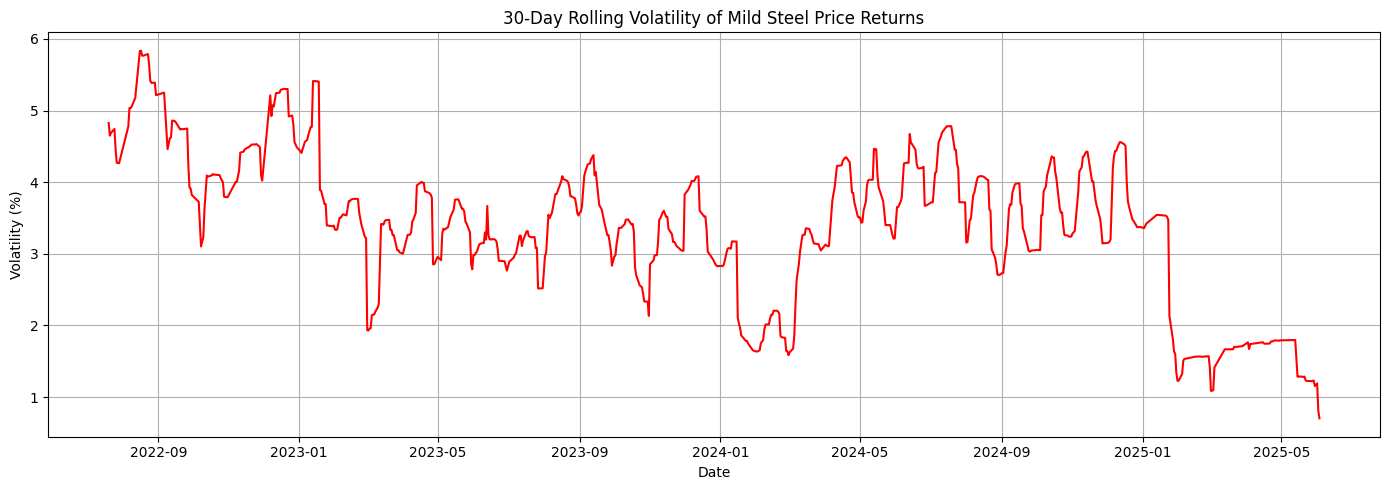

In [ ]:
# Calculate rolling volatility
df_filtered['30-day Volatility'] = df_filtered['Daily Return (%)'].rolling(window=30).std()

plt.figure(figsize=(14, 5))
plt.plot(df_filtered['Date'], df_filtered['30-day Volatility'], color='red')
plt.title('30-Day Rolling Volatility of Mild Steel Price Returns')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Exponential Moving Averages (EMA)**: More sensitive to recent price changes than simple MA, capturing trend shifts faster.
##**MACD Indicator**: Shows momentum and potential buy/sell signals through convergence/divergence of EMAs.

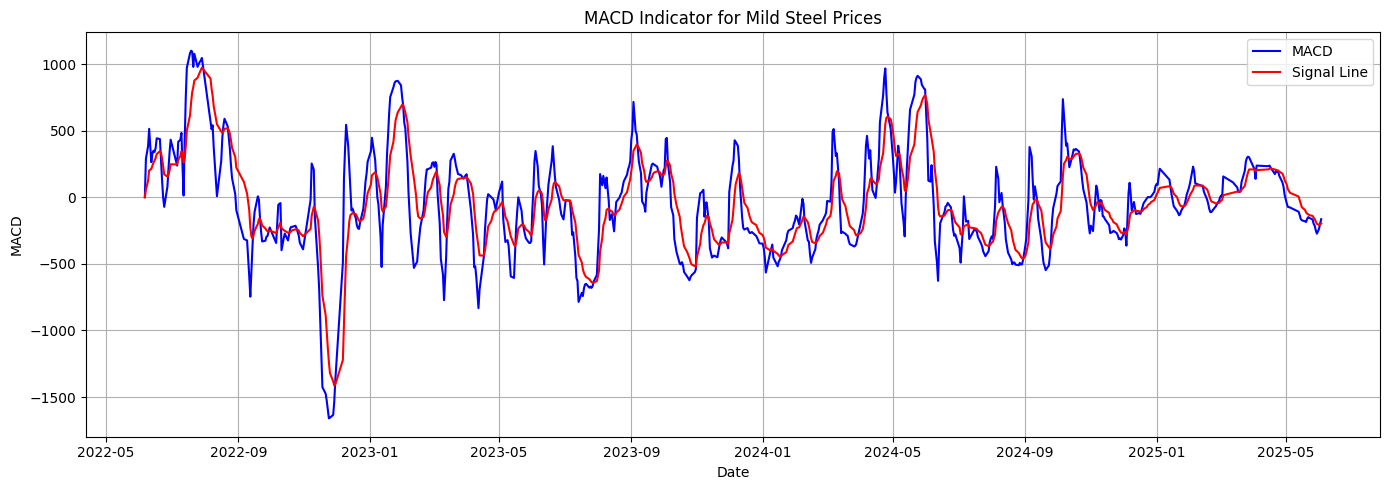

In [ ]:
# Calculate EMAs
df_filtered['EMA_12'] = df_filtered['Price'].ewm(span=12, adjust=False).mean()
df_filtered['EMA_26'] = df_filtered['Price'].ewm(span=26, adjust=False).mean()

# Calculate MACD and Signal Line
df_filtered['MACD'] = df_filtered['EMA_12'] - df_filtered['EMA_26']
df_filtered['Signal Line'] = df_filtered['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD and Signal Line
plt.figure(figsize=(14, 5))
plt.plot(df_filtered['Date'], df_filtered['MACD'], label='MACD', color='blue')
plt.plot(df_filtered['Date'], df_filtered['Signal Line'], label='Signal Line', color='red')
plt.title('MACD Indicator for Mild Steel Prices')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Seasonal Decomposition**: Detects any repeating seasonal patterns or cycles in prices, which can guide timing for buying or selling.

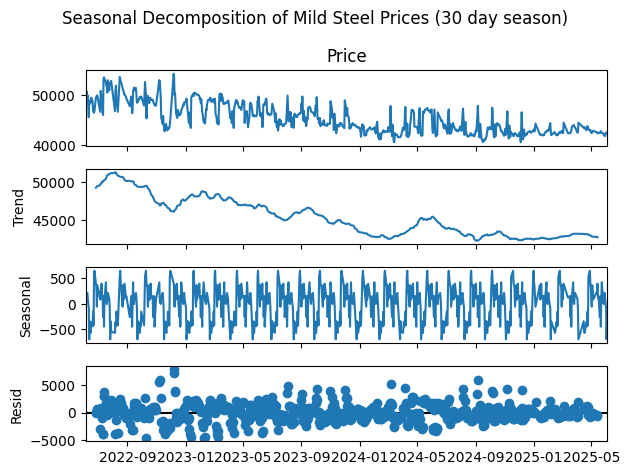

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index
df_filtered.set_index('Date', inplace=True)

# Decompose with monthly frequency (approx 30 days)
result = seasonal_decompose(df_filtered['Price'], model='additive', period=30)

result.plot()
plt.suptitle('Seasonal Decomposition of Mild Steel Prices (30 day season)')
plt.tight_layout()
plt.show()

# Reset index for further use if needed
df_filtered.reset_index(inplace=True)


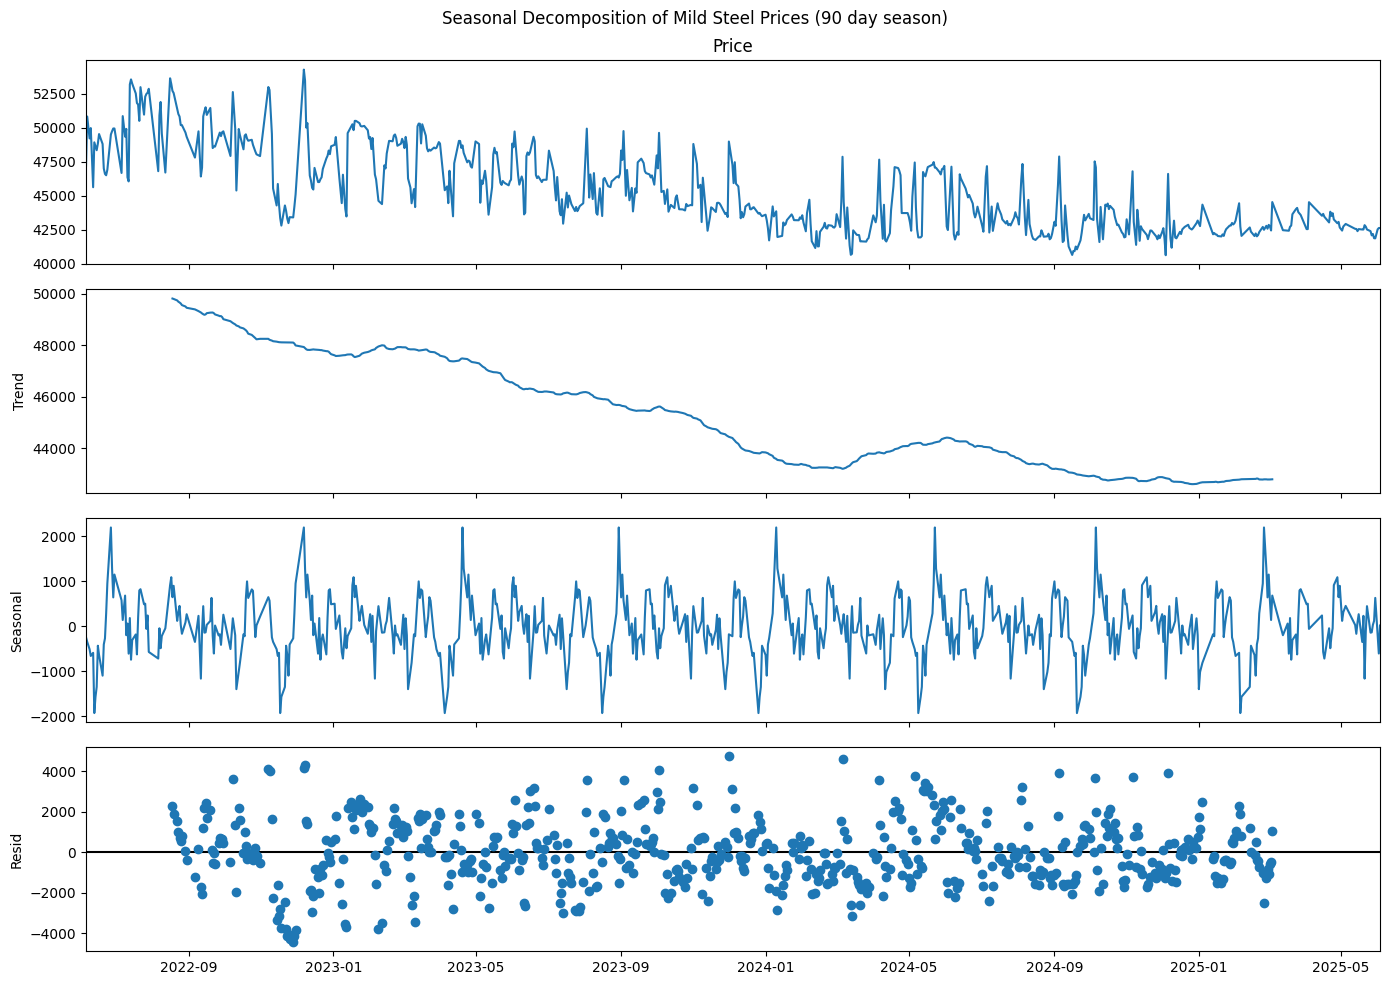

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index
df_filtered.set_index('Date', inplace=True)

# Decompose with monthly frequency (approx 90 days)
result = seasonal_decompose(df_filtered['Price'], model='additive', period=90)

fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Mild Steel Prices (90 day season)')
plt.tight_layout()
plt.show()

# Reset index for further use if needed
df_filtered.reset_index(inplace=True)

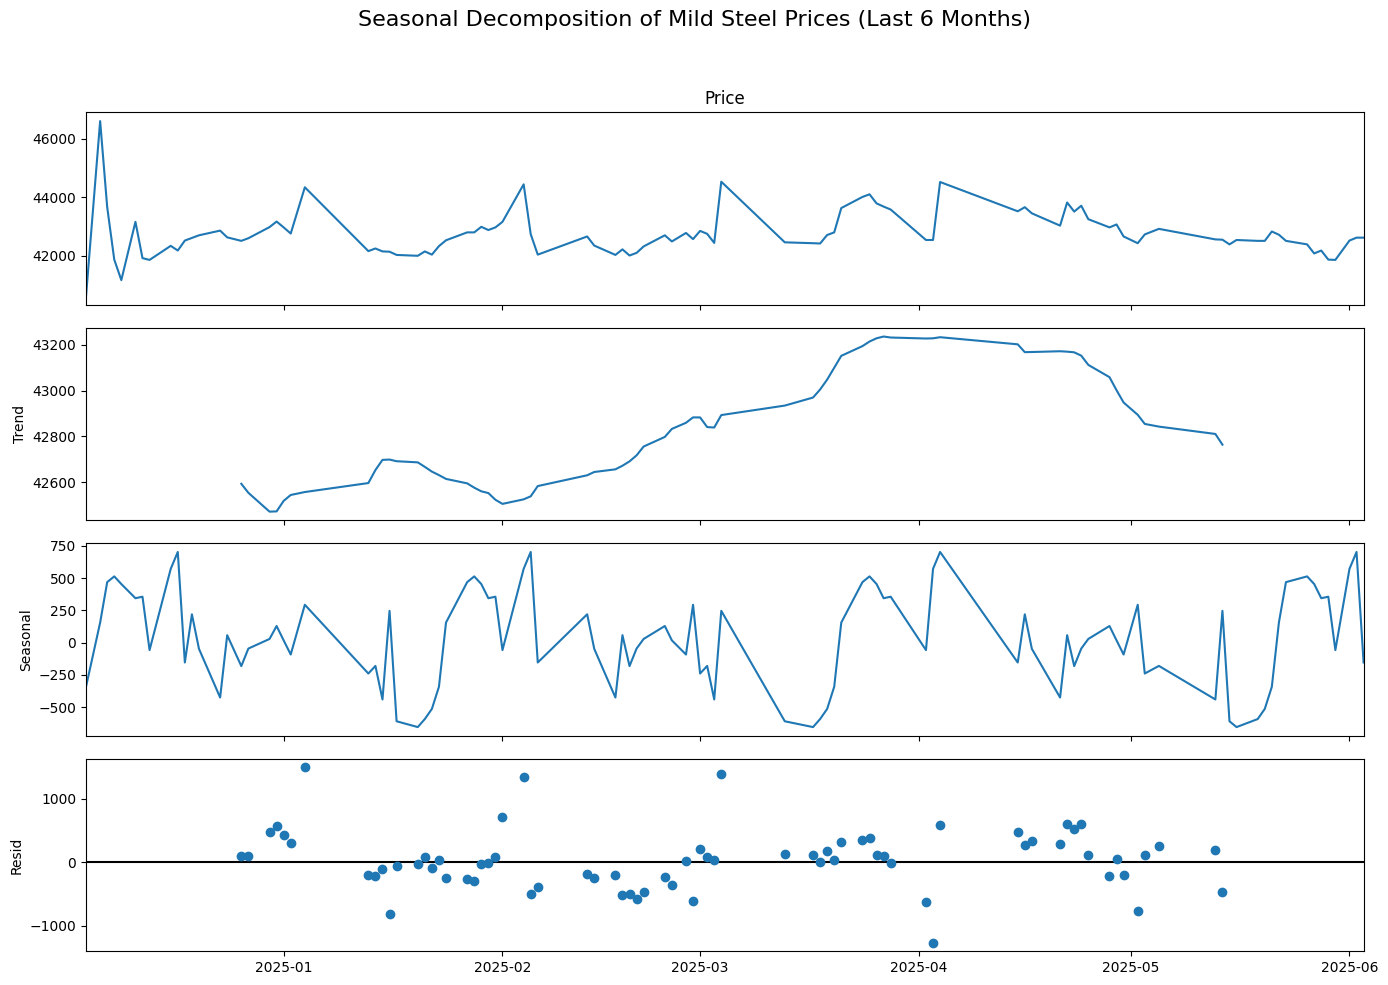

In [ ]:
# Set 'Date' as index for decomposition
recent_data.set_index('Date', inplace=True)

# Perform seasonal decomposition with monthly period (~30 days)
result = seasonal_decompose(recent_data['Price'], model='additive', period=30)

# Plot the decomposition components for the last 6 months
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Mild Steel Prices (Last 6 Months)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust title spacing
plt.show()

# Reset index if needed for further analysis
recent_data.reset_index(inplace=True)

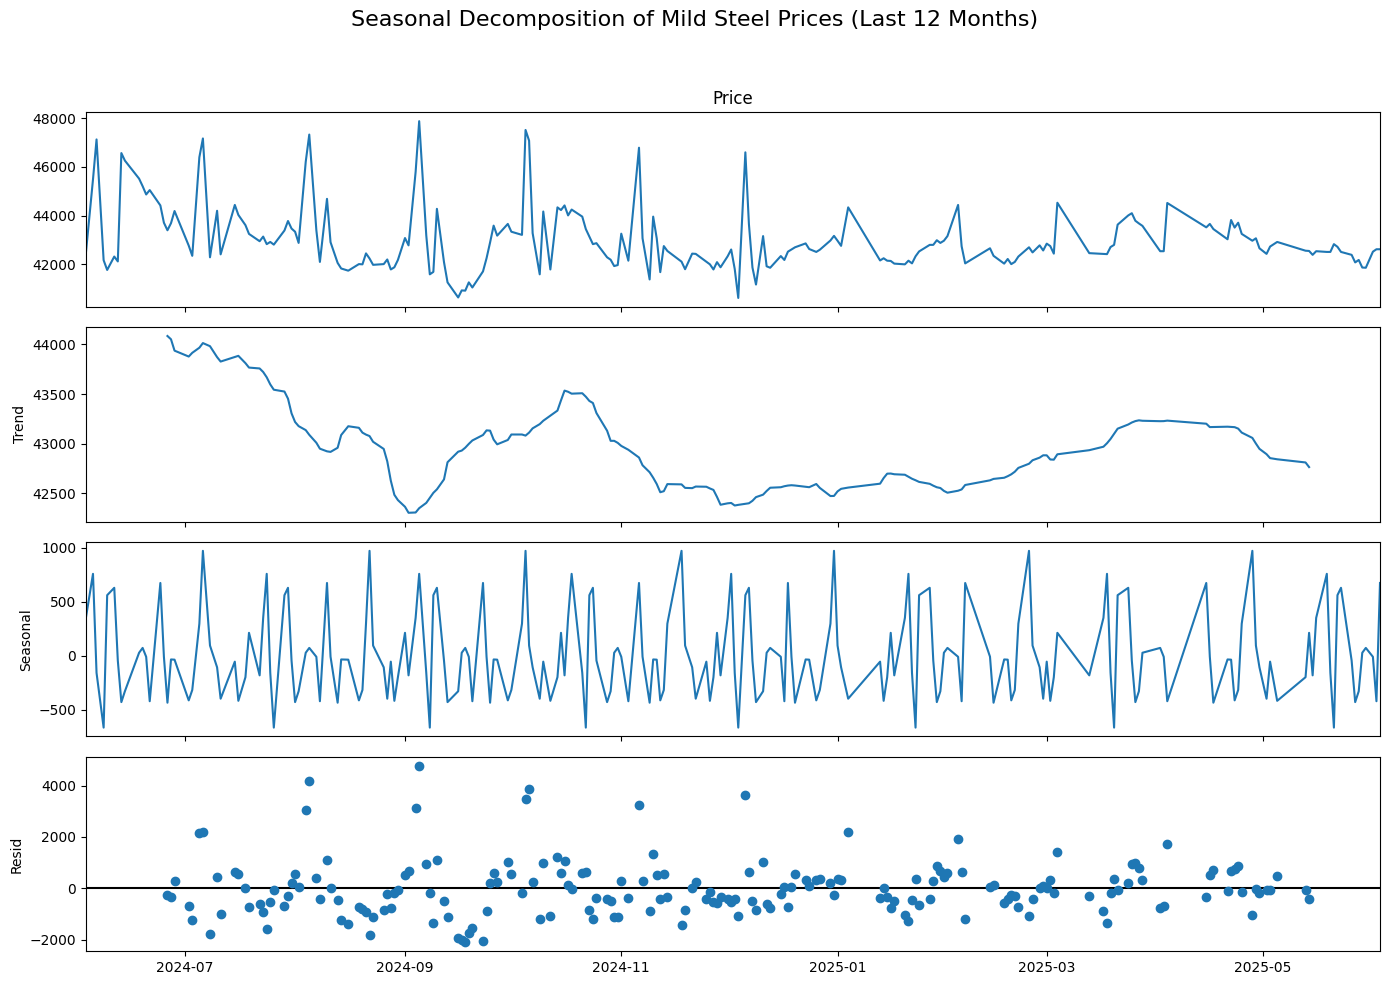

In [ ]:
# Filter data for the last 12 months
last_date = df_filtered['Date'].max()
twelve_months_ago = last_date - pd.DateOffset(months=12)
df_recent = df_filtered[df_filtered['Date'] >= twelve_months_ago].copy()

# Set 'Date' as index for decomposition
df_recent.set_index('Date', inplace=True)

# Perform seasonal decomposition with monthly period (~30 days)
result = seasonal_decompose(df_recent['Price'], model='additive', period=30)

# Plot the decomposition components for the last 12 months
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Mild Steel Prices (Last 12 Months)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust title spacing
plt.show()

# Reset index if needed later
df_recent.reset_index(inplace=True)
